In [7]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
health = pd.read_csv("/cs_proj/Finhack/insurance.csv")
health.head(3)
# general health information dataset is loaded. 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [9]:
diseases = pd.read_csv("/cs_proj/Finhack/U.S._Chronic_Disease_Indicators__CDI_.csv")

diseases.head(3)

C:\Users\kdfer\AppData\Local\Temp\ipykernel_40764\2244087086.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  diseases = pd.read_csv("/cs_proj/Finhack/U.S._Chronic_Disease_Indicators__CDI_.csv")


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,5,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
1,2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,8,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,11,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN


In [10]:
diseases1 = diseases.drop(['LocationAbbr', 'LocationDesc','DataSource', 'Question','Response', 'DataValueUnit', 'DataValueType', 'LocationID', 
                           'TopicID', 'QuestionID','StratificationCategoryID2','StratificationID2','StratificationCategoryID3','StratificationID3',
                         'DataValueTypeID', 'StratificationCategoryID1','StratificationID1'], axis = 1)



In [11]:
diseases1.head(3)

,YearStart,YearEnd,Topic,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,GeoLocation,ResponseID
0,2014,2014,Asthma,916,916.0,NaN,NaN,NaN,NaN,Gender,Male,NaN,NaN,NaN,NaN,POINT (-92.27449074299966 34.74865012400045),NaN
1,2018,2018,Asthma,2227,2227.0,NaN,NaN,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,POINT (-106.13361092099967 38.843840757000464),NaN
2,2018,2018,Asthma,708,708.0,NaN,NaN,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,POINT (-77.036871 38.907192),NaN


In [12]:
diseases2 = diseases1.drop(['DataValue', 'DataValueAlt','DataValueFootnoteSymbol', 'DatavalueFootnote','LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1', 
                           'Stratification1', 'StratificationCategory2','Stratification2','StratificationCategory3','Stratification3','GeoLocation',
                         'ResponseID'], axis = 1)

diseases2.head(100)

,YearStart,YearEnd,Topic
0,2014,2014,Asthma
1,2018,2018,Asthma
2,2018,2018,Asthma
3,2017,2017,Asthma
4,2010,2010,Asthma
...,...,...,...
95,2011,2015,Cancer
96,2013,2017,Cancer
97,2013,2017,Cancer
98,2011,2015,Cancer


In [13]:
cpi = pd.read_csv("/cs_proj/Finhack/CPIMEDSL.csv")


cpi.head(3)

,observation_date,CPIMEDSL
0,1947-01-01,13.2
1,1947-02-01,13.3
2,1947-03-01,13.3


In [14]:
health.head(3)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [15]:
diseases2.head(3)

,YearStart,YearEnd,Topic
0,2014,2014,Asthma
1,2018,2018,Asthma
2,2018,2018,Asthma


In [16]:
cpi['observation_date'] = cpi['observation_date'].str[:4]
cpi.head(3)

,observation_date,CPIMEDSL
0,1947,13.2
1,1947,13.3
2,1947,13.3


In [17]:
cpi = cpi.rename(columns={'observation_date': 'Year','CPIMEDSL': 'CPI'})

cpi.head(3)

,Year,CPI
0,1947,13.2
1,1947,13.3
2,1947,13.3


In [18]:
diseases3= diseases2.drop(['YearStart'], axis = 1)
diseases3 = diseases3.rename(columns={'YearEnd': 'Year'})
diseases3.head(3)



,Year,Topic
0,2014,Asthma
1,2018,Asthma
2,2018,Asthma


In [19]:
health.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [20]:
import random
random_year = random.randint(0, 25)

#health['Year'] = (2025-random_year)
health['Year'] = np.random.randint(2000, 2025, size=len(health))

health.head(3)

,age,sex,bmi,children,smoker,region,charges,Year
0,19,female,27.90,0,yes,southwest,16884.9240,2005
1,18,male,33.77,1,no,southeast,1725.5523,2008
2,28,male,33.00,3,no,southeast,4449.4620,2008


In [21]:
# Merge the datasets on the 'year' column
health= health.drop(['region'], axis = 1)

health.head(2)


,age,sex,bmi,children,smoker,charges,Year
0,19,female,27.90,0,yes,16884.9240,2005
1,18,male,33.77,1,no,1725.5523,2008


In [22]:
# need to merge the data

health['Year'] = health['Year'].astype(int)
cpi['Year'] = cpi['Year'].astype(int)
diseases3['Year'] = diseases3['Year'].astype(int)




In [23]:
merged = health.merge(cpi, on='Year', how='inner')

print(merged)

       age     sex    bmi  children smoker     charges  Year      CPI
0       19  female  27.90         0    yes  16884.9240  2005  316.900
1       19  female  27.90         0    yes  16884.9240  2005  318.400
2       19  female  27.90         0    yes  16884.9240  2005  319.700
3       19  female  27.90         0    yes  16884.9240  2005  320.700
4       19  female  27.90         0    yes  16884.9240  2005  321.800
...    ...     ...    ...       ...    ...         ...   ...      ...
16051   61  female  29.07         0    yes  29141.3603  2019  500.662
16052   61  female  29.07         0    yes  29141.3603  2019  501.710
16053   61  female  29.07         0    yes  29141.3603  2019  506.433
16054   61  female  29.07         0    yes  29141.3603  2019  508.315
16055   61  female  29.07         0    yes  29141.3603  2019  510.875

[16056 rows x 8 columns]


In [29]:
# Encode 'Gender' column: Male = 0, Female = 1
merged['sex'] = merged['sex'].map({'male': 0, 'female': 1})

# Encode 'Response' column: Yes = 1, No = 0
merged['smoker'] = merged['smoker'].map({'yes': 1, 'no': 0})

merged.head(3)

,age,sex,bmi,children,smoker,charges,Year,CPI
0,19,1,27.9,0,1,16884.924,2005,316.9
1,19,1,27.9,0,1,16884.924,2005,318.4
2,19,1,27.9,0,1,16884.924,2005,319.7


In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
X = merged.drop('charges', axis = 1)
y = merged['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()





model.fit(X_train, y_train)

y_pred = model.predict(X_test)



In [ ]:
r2 = model.score(X_test, y_test)
print(f'R-squared: {r2}')



R-squared: 0.7486108617973174


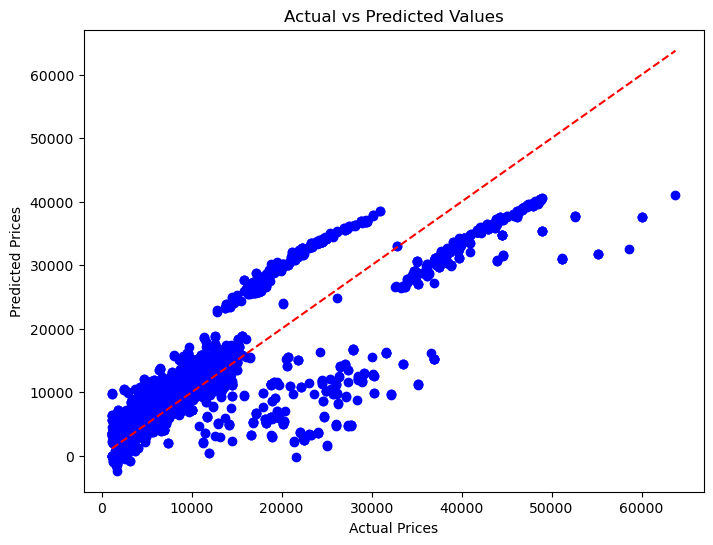

In [38]:
# Plotting actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line for perfect prediction
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

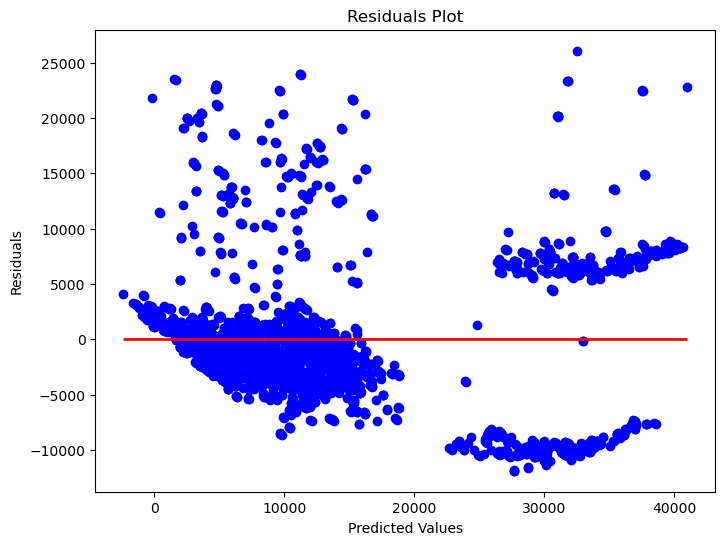

In [39]:
# Calculate residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, color='blue')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

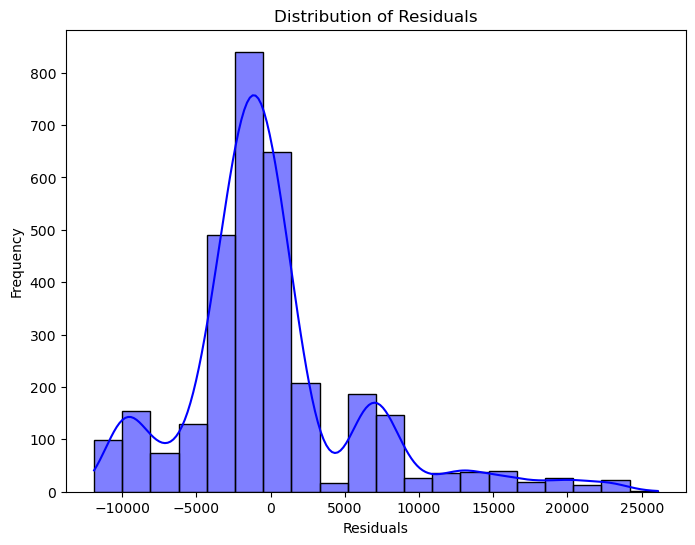

In [40]:
# Plotting histogram of residuals
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color='blue', bins=20)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()